In [4]:
from matplotlib.ticker import FuncFormatter
import pandas as pd
import matplotlib.pyplot as plt

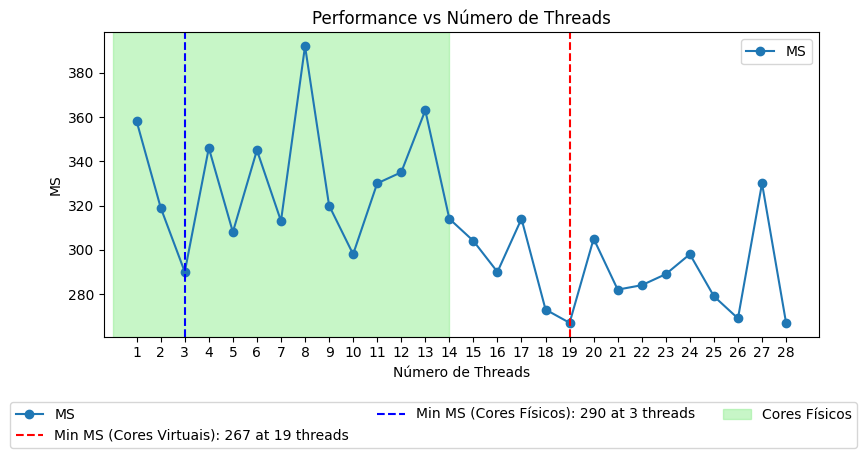

In [5]:
df = pd.read_csv('../out/multi-thread.csv')

numero_cores_fisicas = 14

df_virtual = df[df['N_threads'] > numero_cores_fisicas]
min_ms_virtual = df_virtual['MS'].min()
min_thread_virtual = df_virtual[df_virtual['MS'] == min_ms_virtual]['N_threads'].iloc[0]

df_fisico = df[df['N_threads'] <= numero_cores_fisicas]
min_ms_fisico = df_fisico['MS'].min()
min_thread_fisico = df_fisico[df_fisico['MS'] == min_ms_fisico]['N_threads'].iloc[0]

fig, grafico = plt.subplots(figsize=(8, 4))
df.plot(x="N_threads", y="MS", kind="line", marker="o", linestyle="-", ax=grafico)

plt.title('Performance vs Número de Threads')
plt.xlabel('Número de Threads')
plt.ylabel('MS')

grafico.set_xticks(df["N_threads"])

grafico.axvline(x=min_thread_virtual, color='r', linestyle='--', label=f'Min MS (Cores Virtuais): {min_ms_virtual} at {min_thread_virtual} threads')
grafico.axvline(x=min_thread_fisico, color='b', linestyle='--', label=f'Min MS (Cores Físicos): {min_ms_fisico} at {min_thread_fisico} threads')

grafico.axvspan(0, numero_cores_fisicas, color='lightgreen', alpha=0.5, label='Cores Físicos')

handles, labels = grafico.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()

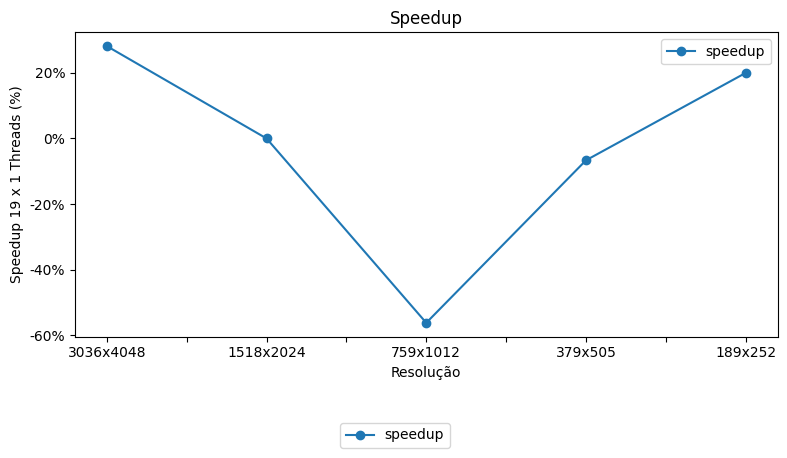

In [6]:
df = pd.read_csv('../out/speedup.csv')

def calculate_speedup(row):
    return 1 - int(row['IDEAL_T']) / int(row['UMT'])

df['speedup'] = df.apply(calculate_speedup, axis=1)

t_ideal = df['IDEAL'][0]

fig, grafico = plt.subplots(figsize=(8, 4))

df['Resolution_int'] = df['Resolution'].apply(lambda x: int(x.split('x')[0]))
df = df.sort_values('Resolution_int', ascending=False)

df.plot(x="Resolution", y="speedup", kind="line", marker="o", linestyle="-", ax=grafico)

plt.title('Speedup')
plt.xlabel('Resolução')
plt.ylabel(f'Speedup {t_ideal} x 1 Threads (%)')

def to_percent(y, _):
    return f'{y * 100:.0f}%'

grafico.yaxis.set_major_formatter(FuncFormatter(to_percent))

handles, labels = grafico.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)

for index, row in df.iterrows():
    grafico.annotate(f"{row['speedup']*100:.0f}", (row['Resolution_int'], row['speedup']), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()

plt.show()

In [7]:
print("Jupyter")

Jupyter
